In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('honda_sell_data.csv')
df.head()

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,MPG,Fuel_Type,Transmission,Engine,VIN,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,2023,Honda,Ridgeline RTL,New,"$46,370",4.8,9,Platinum White Pearl,Beige,All-wheel Drive,NaN,Gasoline,Automatic,3.5L V6 24V GDI SOHC,5FPYK3F58PB011817,00830164,10,5.0,4.8,4.8,4.2,5.0,5.0,CA,Dealer
1,2023,Honda,CR-V Hybrid Sport,New,"$34,150",1.7,24,Platinum White Pearl,Black,FWD,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS5H5XPH702953,6402953,–,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
2,2023,Honda,CR-V Hybrid Sport,New,"$34,245",4.7,2869,Meteorite Gray Metallic,Black,Front-wheel Drive,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS5H55PH704805,PH704805,1,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
3,2022,Honda,Pilot TrailSport,New,"$46,500",5.0,12,Sonic Gray Pearl,Black,All-wheel Drive,19–25,Gasoline,9-Speed Automatic,3.5L V6 24V GDI SOHC,5FNYF6H82NB100429,5700429B,5,5.0,5.0,5.0,5.0,5.0,5.0,CA,Dealer
4,2023,Honda,CR-V Hybrid Sport Touring,New,"$40,395",4.4,12,Crystal Black Pearl,Black,All-wheel Drive,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS6H90PH805954,5705954,5,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer


# Data Preprocessing Part 1

In [13]:
# remove null values and 'Not Priced' data from Price column
df = df.dropna(subset=['Price']).loc[df['Price'] != 'Not Priced']

# remove comma and dollar sign
df['Price'] = df['Price'].str.replace(',', '').str.replace('$', '')

# drop the NaN values
df = df[df['Price'].notna()]

# convert to integer
df['Price'] = df['Price'].astype(int)

# display the updated DataFrame
df.head()

C:\Users\Michael\AppData\Local\Temp\ipykernel_20776\1613718855.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace(',', '').str.replace('$', '')


,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,MPG,Fuel_Type,Transmission,Engine,VIN,Stock_#,Mileage,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,2023,Honda,Ridgeline RTL,New,46370,4.8,9,Platinum White Pearl,Beige,All-wheel Drive,NaN,Gasoline,Automatic,3.5L V6 24V GDI SOHC,5FPYK3F58PB011817,00830164,10,5.0,4.8,4.8,4.2,5.0,5.0,CA,Dealer
1,2023,Honda,CR-V Hybrid Sport,New,34150,1.7,24,Platinum White Pearl,Black,FWD,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS5H5XPH702953,6402953,–,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
2,2023,Honda,CR-V Hybrid Sport,New,34245,4.7,2869,Meteorite Gray Metallic,Black,Front-wheel Drive,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS5H55PH704805,PH704805,1,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
3,2022,Honda,Pilot TrailSport,New,46500,5.0,12,Sonic Gray Pearl,Black,All-wheel Drive,19–25,Gasoline,9-Speed Automatic,3.5L V6 24V GDI SOHC,5FNYF6H82NB100429,5700429B,5,5.0,5.0,5.0,5.0,5.0,5.0,CA,Dealer
4,2023,Honda,CR-V Hybrid Sport Touring,New,40395,4.4,12,Crystal Black Pearl,Black,All-wheel Drive,NaN,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,2HKRS6H90PH805954,5705954,5,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer


In [14]:
df.dtypes

Year                         int64
Make                        object
Model                       object
Condition                   object
Price                        int32
Consumer_Rating            float64
Consumer_Review_#            int64
Exterior_Color              object
Interior_Color              object
Drivetrain                  object
MPG                         object
Fuel_Type                   object
Transmission                object
Engine                      object
VIN                         object
Stock_#                     object
Mileage                     object
Comfort_Rating             float64
Interior_Design_Rating     float64
Performance_Rating         float64
Value_For_Money_Rating     float64
Exterior_Styling_Rating    float64
Reliability_Rating         float64
State                       object
Seller_Type                 object
dtype: object

In [16]:
# iterate over columns with object datatype
for col in df.select_dtypes(include='object'):
    # count the unique number of values
    unique_count = df[col].nunique()
    # print the result
    print(f'The number of unique values in the "{col}" column is: {unique_count}')

The number of unique values in the "Make" column is: 1
The number of unique values in the "Model" column is: 146
The number of unique values in the "Condition" column is: 3
The number of unique values in the "Exterior_Color" column is: 172
The number of unique values in the "Interior_Color" column is: 62
The number of unique values in the "Drivetrain" column is: 7
The number of unique values in the "MPG" column is: 125
The number of unique values in the "Fuel_Type" column is: 7
The number of unique values in the "Transmission" column is: 58
The number of unique values in the "Engine" column is: 74
The number of unique values in the "VIN" column is: 4949
The number of unique values in the "Stock_#" column is: 4928
The number of unique values in the "Mileage" column is: 2414
The number of unique values in the "State" column is: 53
The number of unique values in the "Seller_Type" column is: 2


In [18]:
df.drop(columns=['VIN', 'Stock_#', 'Mileage', 'Model', 'Exterior_Color', 'Interior_Color',
                'MPG', 'Transmission', 'Engine'], inplace=True)
df.shape

(4960, 16)

In [19]:
# iterate over columns with object datatype
for col in df.select_dtypes(include='object'):
    # count the unique number of values
    unique_count = df[col].nunique()
    # print the result
    print(f'The number of unique values in the "{col}" column is: {unique_count}')

The number of unique values in the "Make" column is: 1
The number of unique values in the "Condition" column is: 3
The number of unique values in the "Drivetrain" column is: 7
The number of unique values in the "Fuel_Type" column is: 7
The number of unique values in the "State" column is: 53
The number of unique values in the "Seller_Type" column is: 2


In [21]:
# create a dictionary with state abbreviations as keys and full state names as values
state_dict = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# use the dictionary to replace the state abbreviations with full state names
df['State'] = df['State'].replace(state_dict)
# print the updated DataFrame
df.head()

,Year,Make,Condition,Price,Consumer_Rating,Consumer_Review_#,Drivetrain,Fuel_Type,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,2023,Honda,New,46370,4.8,9,All-wheel Drive,Gasoline,5.0,4.8,4.8,4.2,5.0,5.0,California,Dealer
1,2023,Honda,New,34150,1.7,24,FWD,Hybrid,5.0,3.0,4.0,4.0,5.0,5.0,California,Dealer
2,2023,Honda,New,34245,4.7,2869,Front-wheel Drive,Hybrid,5.0,3.0,4.0,4.0,5.0,5.0,California,Dealer
3,2022,Honda,New,46500,5.0,12,All-wheel Drive,Gasoline,5.0,5.0,5.0,5.0,5.0,5.0,California,Dealer
4,2023,Honda,New,40395,4.4,12,All-wheel Drive,Hybrid,5.0,3.0,4.0,4.0,5.0,5.0,California,Dealer


In [31]:
df.State.unique()

array(['California', 'Nevada', 'Arizona', 'Utah', 'Colorado',
       'Washington', 'Nebraska', 'Oklahoma', 'Texas', 'Kansas',
       'Missouri', 'Iowa', 'Minnesota', 'Louisiana', 'Wisconsin',
       'Illinois', 'Kentucky', 'Michigan', 'Indiana', 'Georgia', 'Ohio',
       'Tennessee', 'North Carolina', 'Virginia', 'Florida', 'Maryland',
       'Delaware', nan, 'Pennsylvania', 'New Jersey', 'Connecticut',
       'Massachusetts', 'Arkansas', 'West Virginia', 'New York',
       'New Hampshire', 'New Mexico', 'Vermont', 'Oregon',
       'South Carolina', 'Idaho', 'Montana', 'South Dakota',
       'North Dakota', 'Alabama', 'Alaska', 'Maine', 'Hawaii',
       'Mississippi', 'Rhode Island', 'Route', 'Wyoming', 'Glens',
       'MO-22'], dtype=object)

In [32]:
states_to_remove = ['Glens', 'MO-22']
df = df.loc[~df['State'].isin(states_to_remove)]

In [36]:
df.to_csv('honda.csv', index=False)

# Exploratory Data Analysis

# Visualize the average price in each state (Exclude Alaska), im using Tableau to visualize it

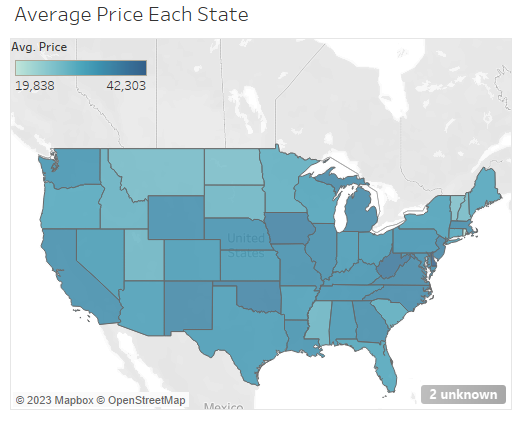

See the map visualization here : https://public.tableau.com/app/profile/michael.wiryaseputra/viz/AveragePriceUSState/Dashboard1?publish=yes

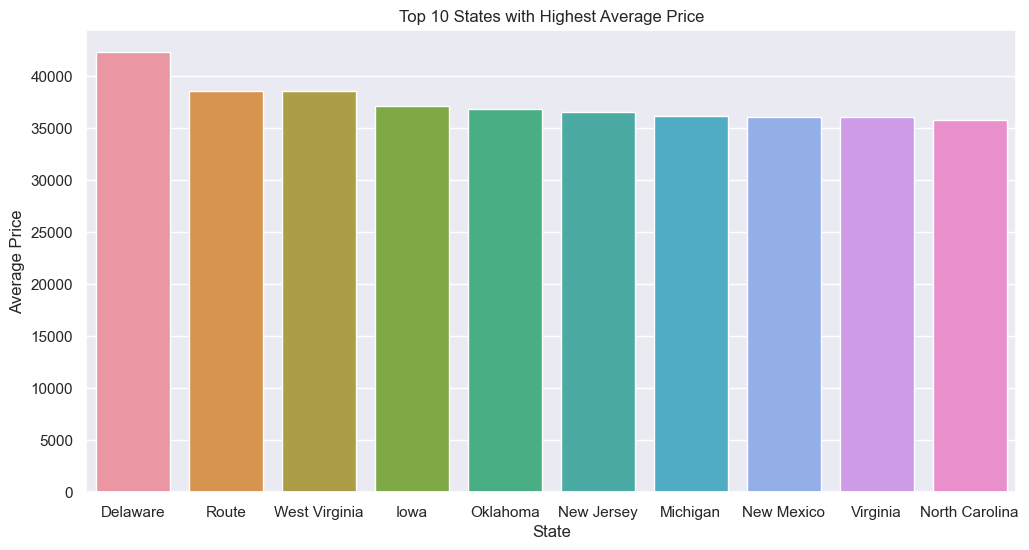

In [51]:
# group data by state and compute mean price
state_price = df.groupby('State')['Price'].mean()

# sort by price in descending order and select top 10 states
top_states = state_price.sort_values(ascending=False).head(10)

# create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.xlabel('State')
plt.ylabel('Average Price')
plt.title('Top 10 States with Highest Average Price')
plt.show()

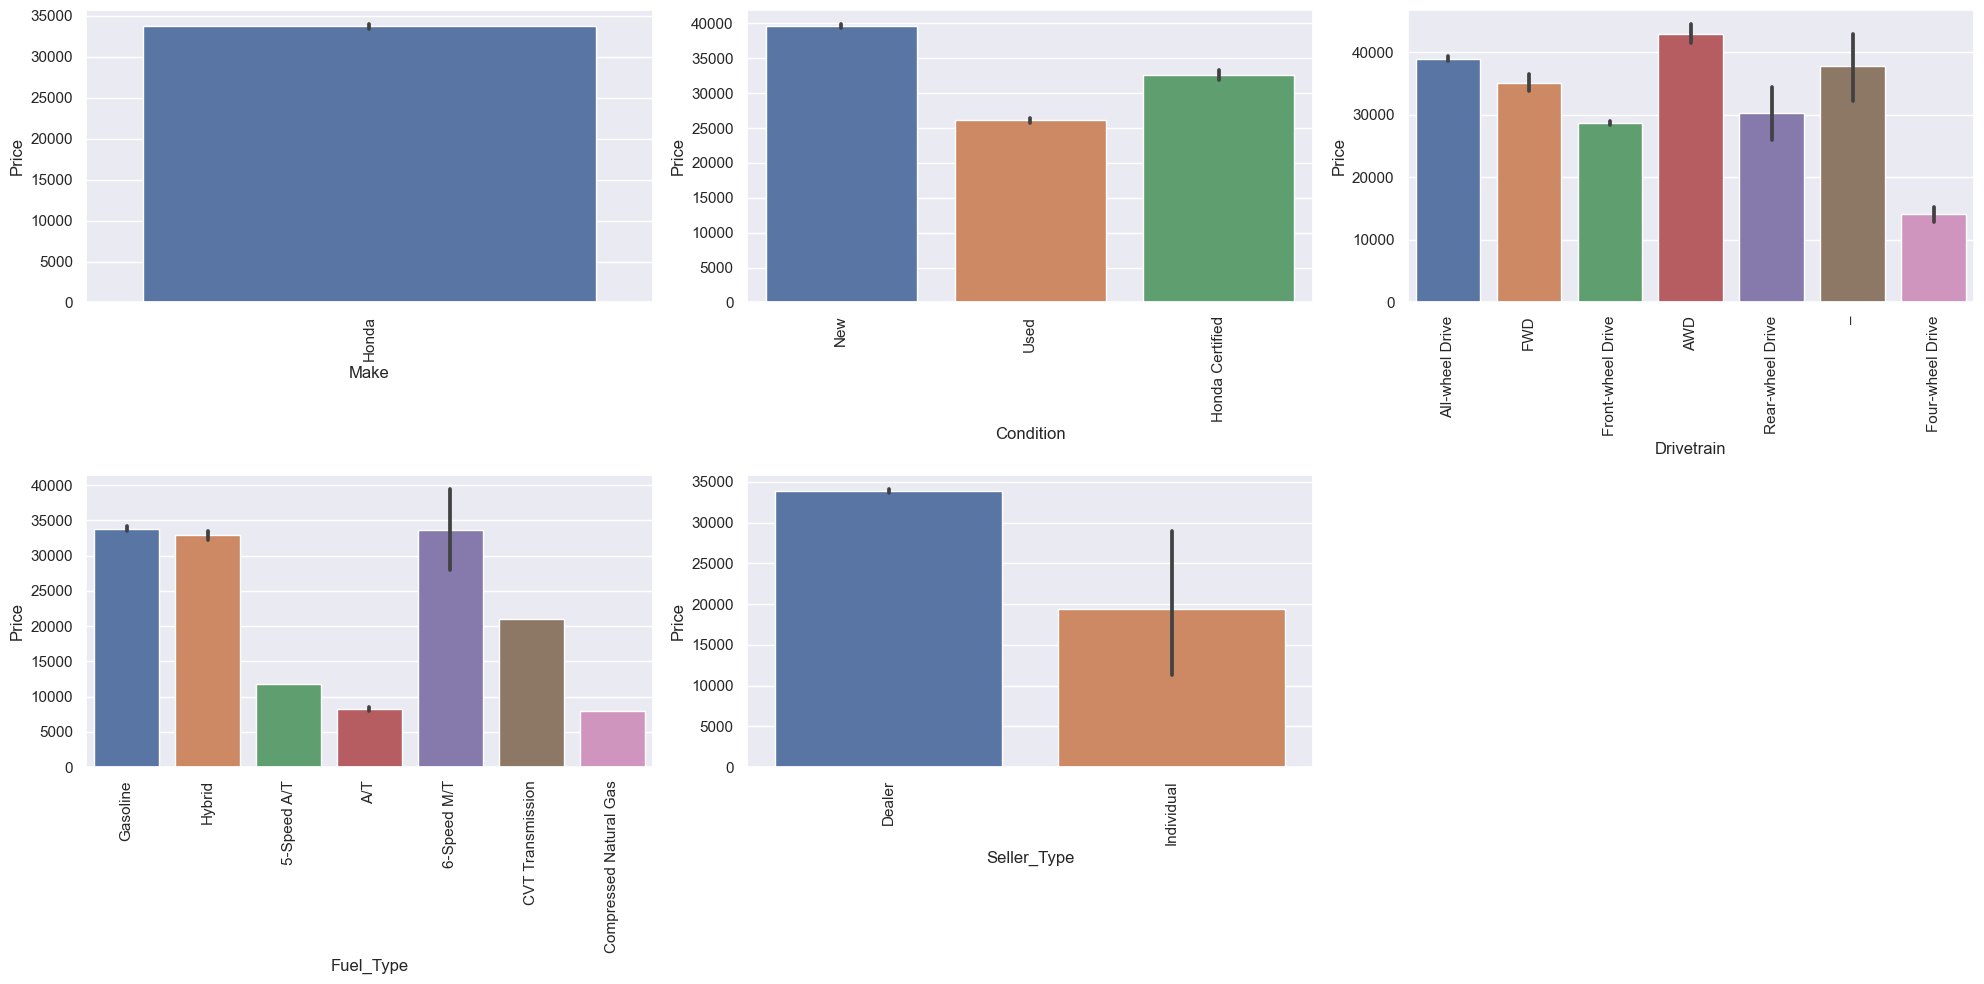

In [41]:
# list of categorical variables to plot
cat_vars = ['Make', 'Condition', 'Drivetrain', 'Fuel_Type', 'Seller_Type']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.ravel()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Price', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# remove the sixth subplot
fig.delaxes(axs[5])

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()


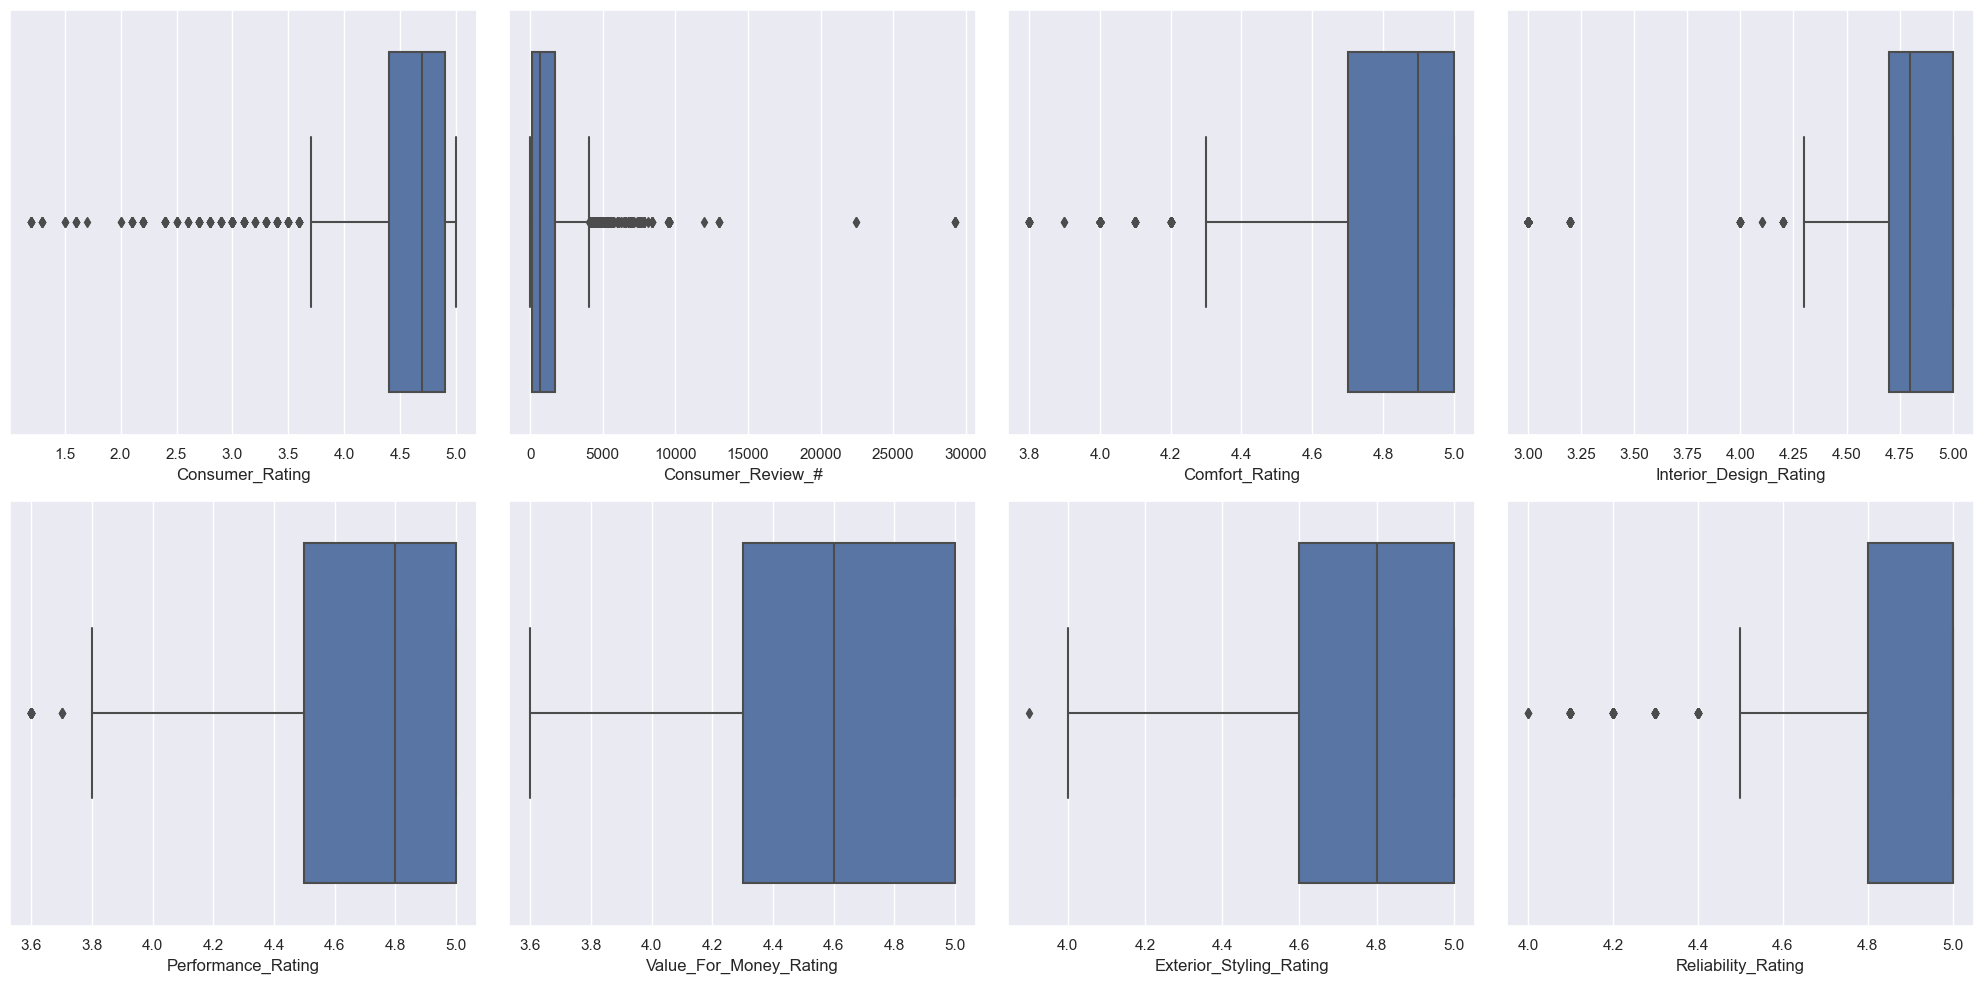

In [43]:
num_vars = ['Consumer_Rating', 'Consumer_Review_#', 'Comfort_Rating', 'Interior_Design_Rating', 'Performance_Rating', 
            'Value_For_Money_Rating', 'Exterior_Styling_Rating', 'Reliability_Rating']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

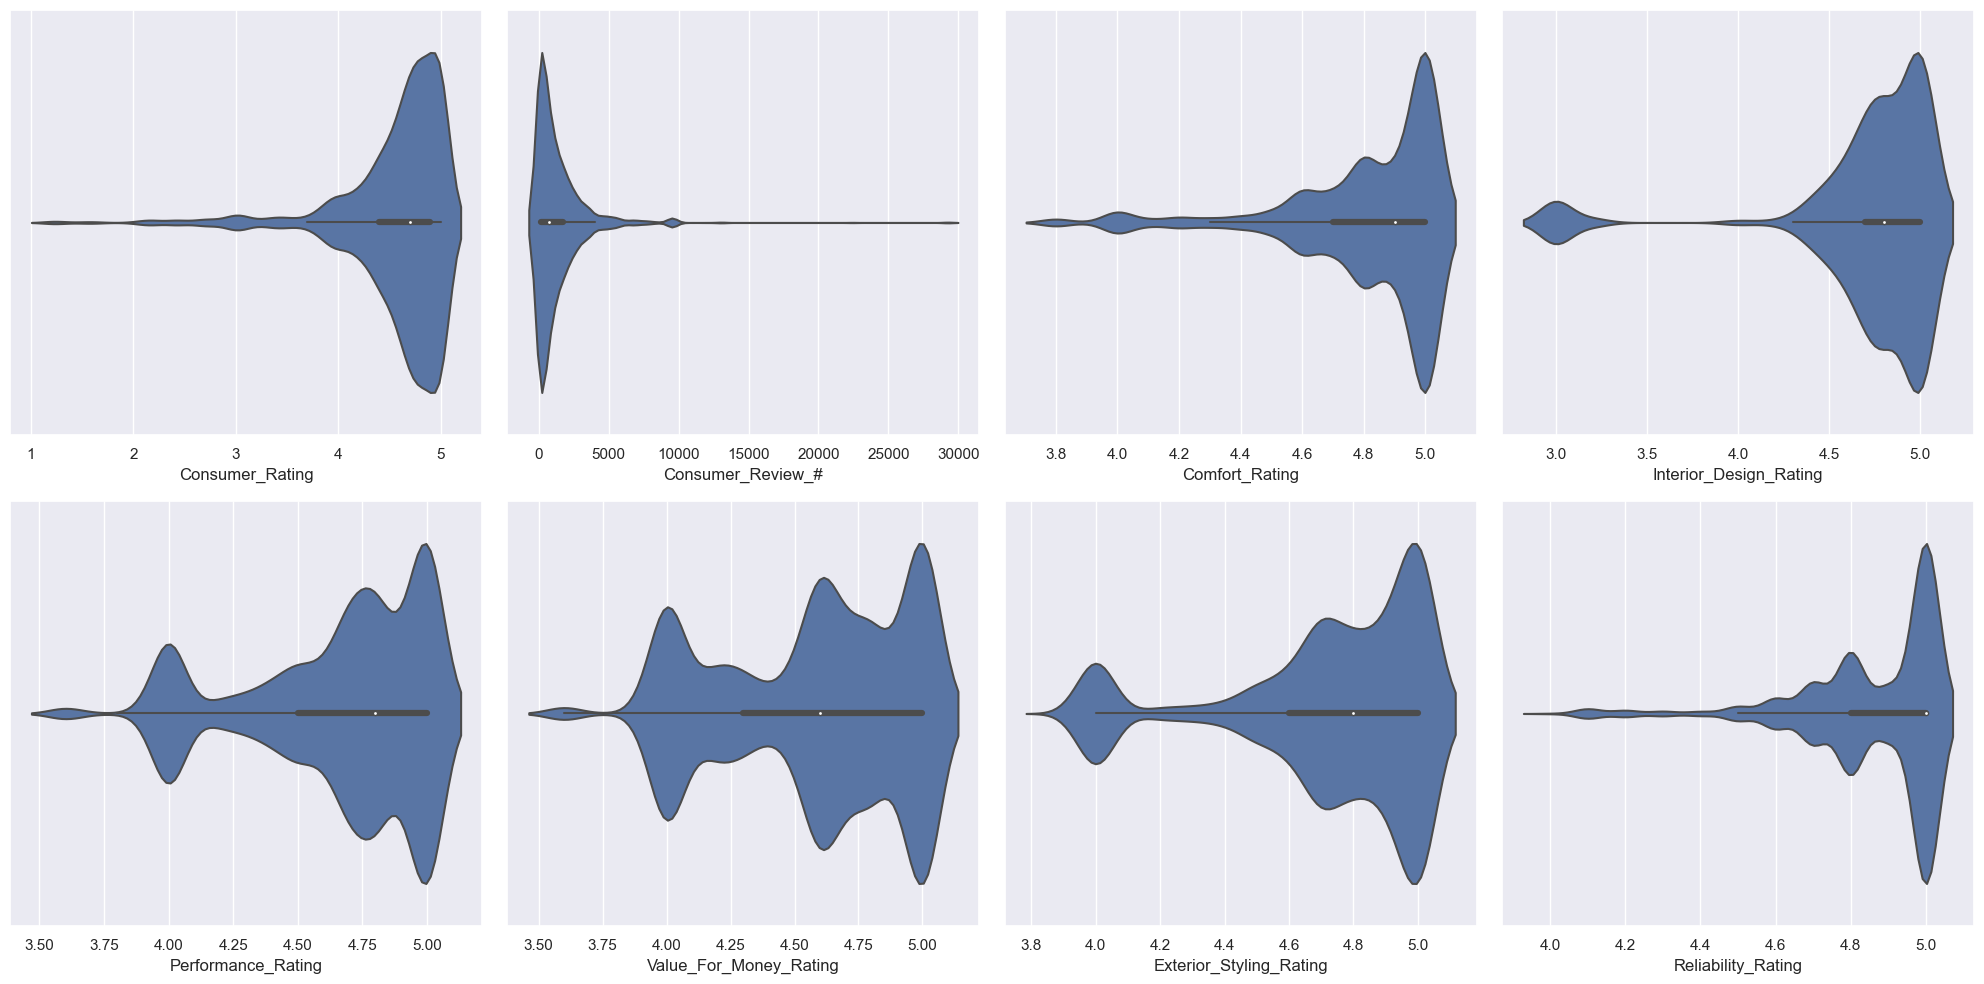

In [45]:
num_vars = ['Consumer_Rating', 'Consumer_Review_#', 'Comfort_Rating', 'Interior_Design_Rating', 'Performance_Rating', 
            'Value_For_Money_Rating', 'Exterior_Styling_Rating', 'Reliability_Rating']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

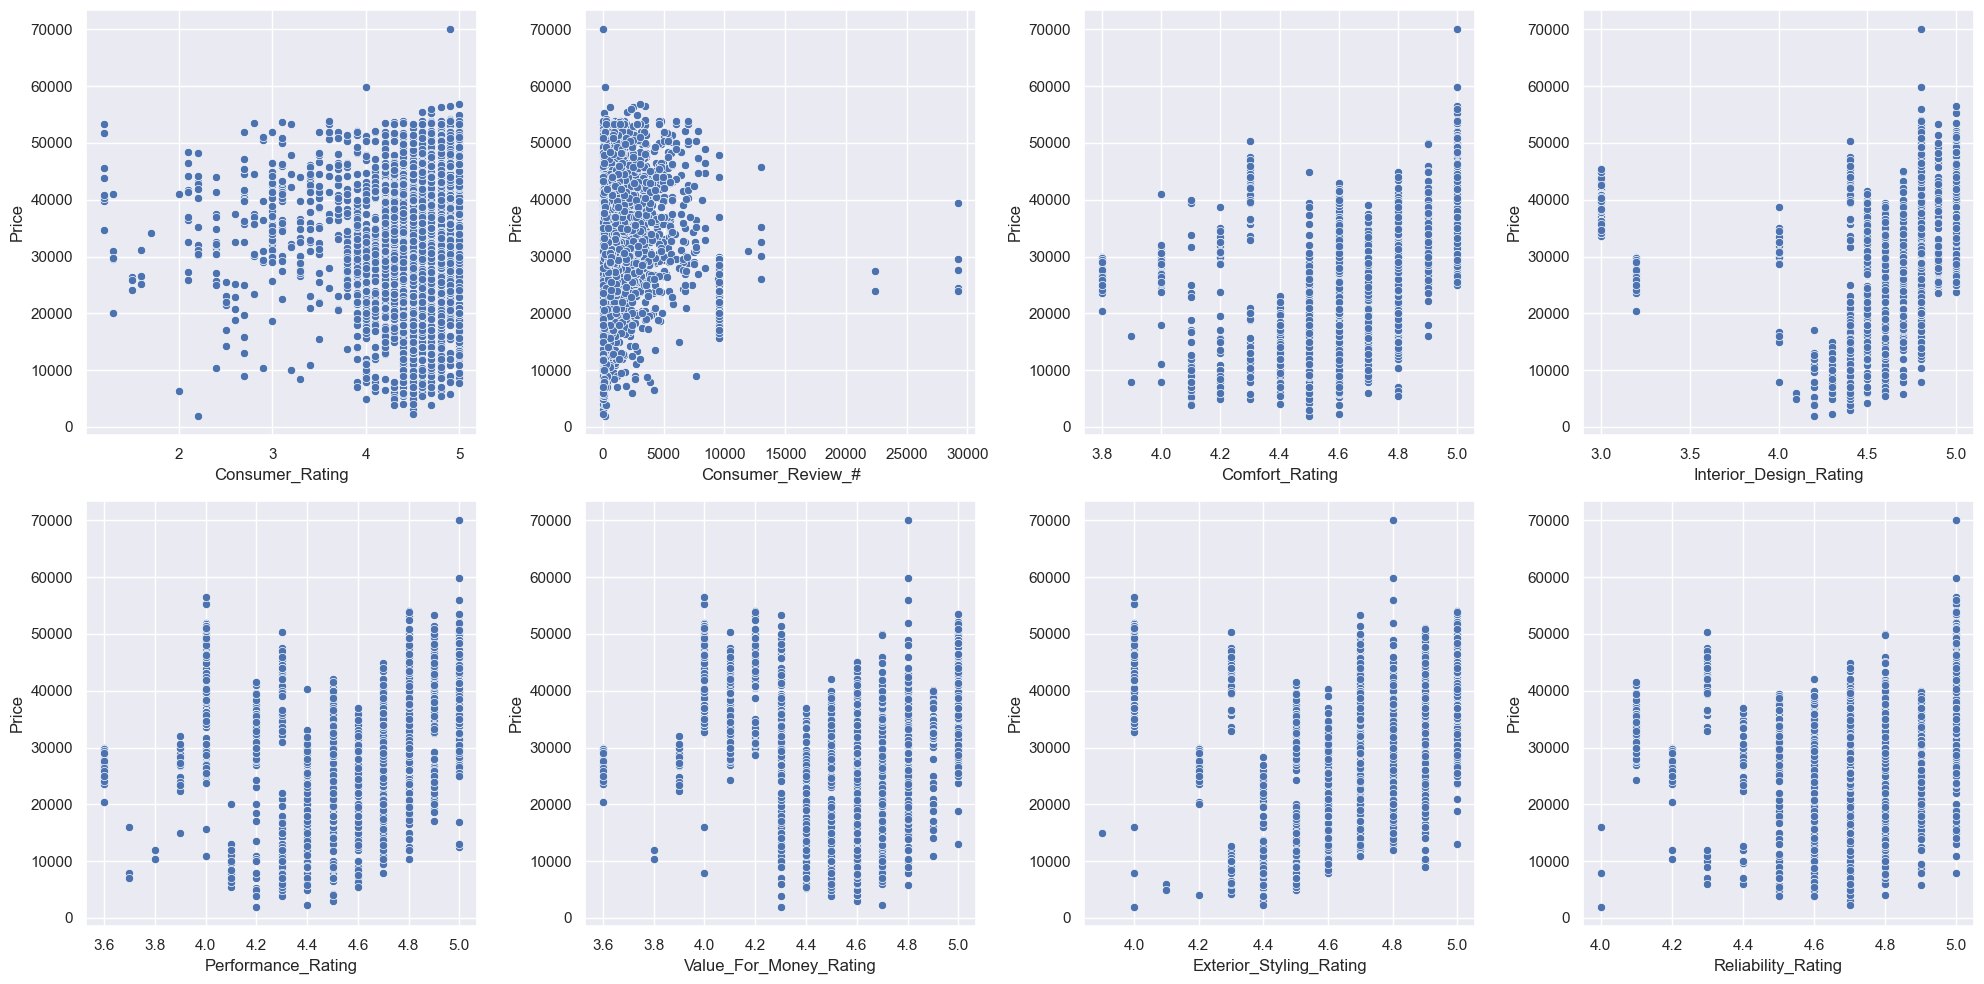

In [47]:
num_vars = ['Consumer_Rating', 'Consumer_Review_#', 'Comfort_Rating', 'Interior_Design_Rating', 'Performance_Rating', 
            'Value_For_Money_Rating', 'Exterior_Styling_Rating', 'Reliability_Rating']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Price', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

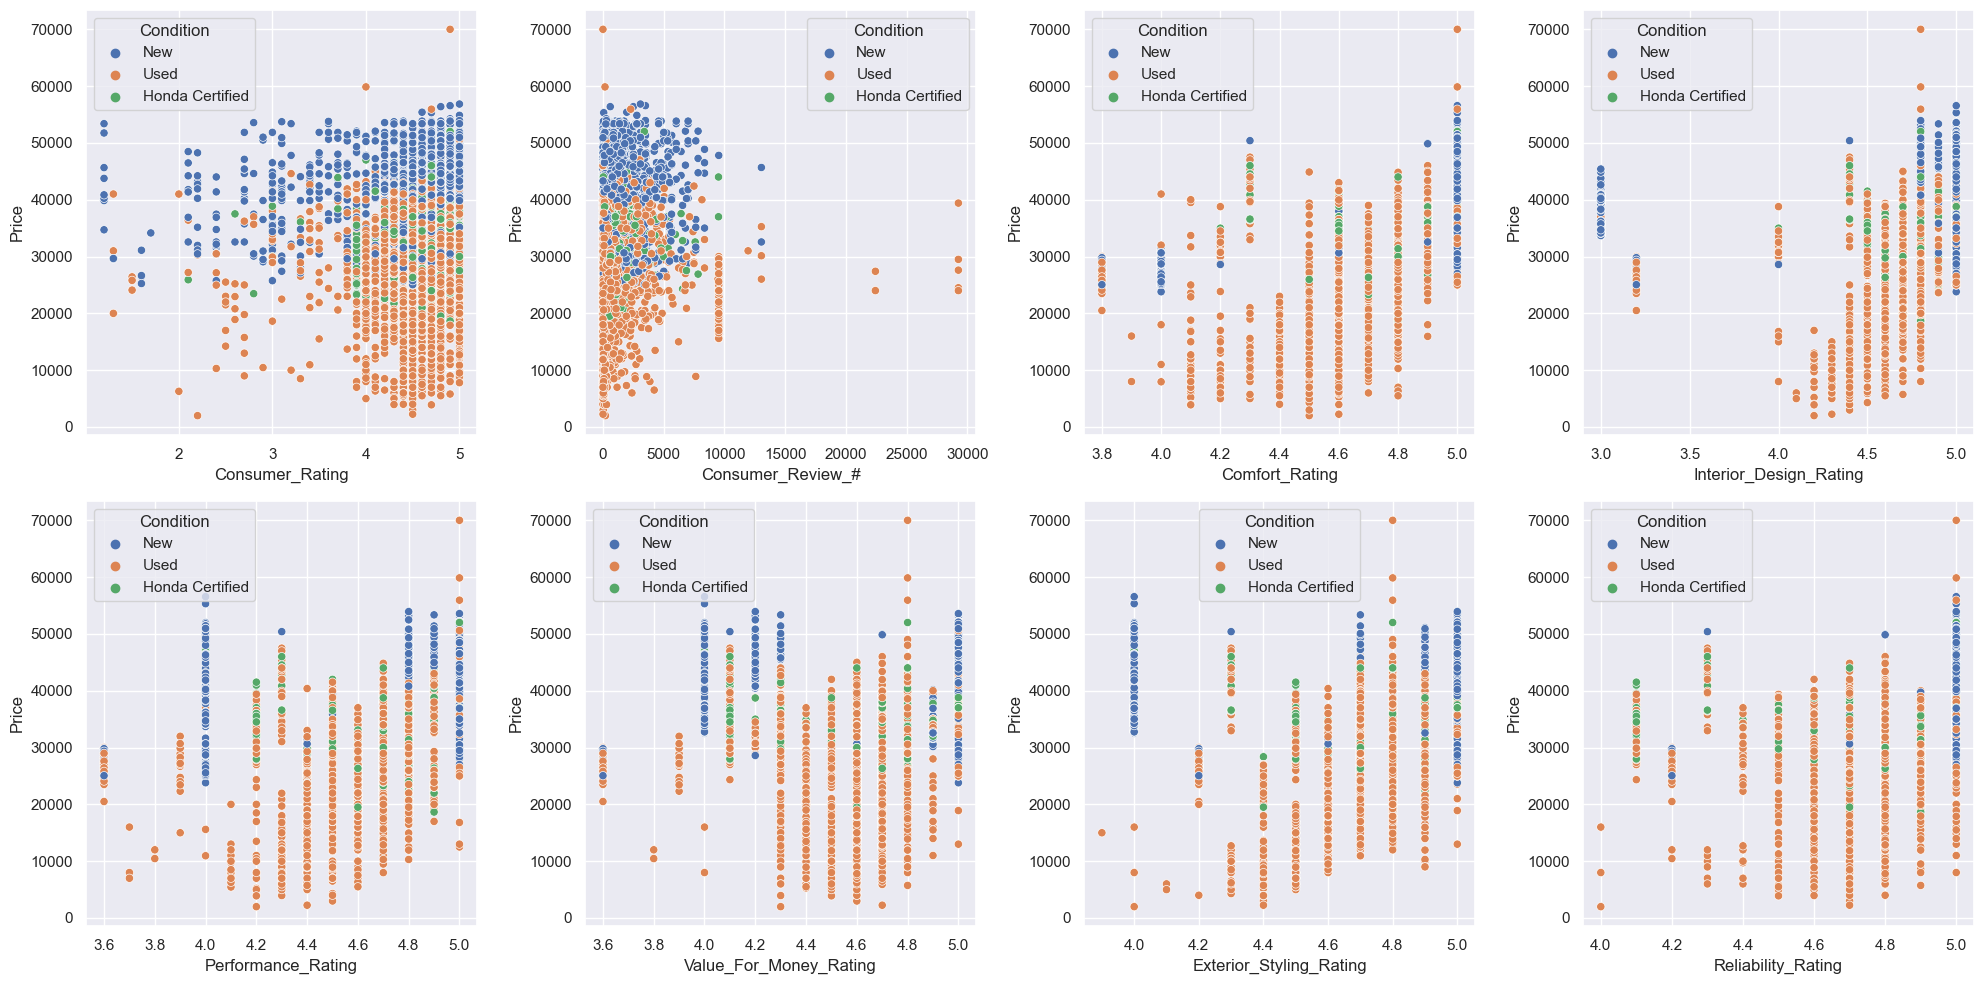

In [49]:
num_vars = ['Consumer_Rating', 'Consumer_Review_#', 'Comfort_Rating', 'Interior_Design_Rating', 'Performance_Rating', 
            'Value_For_Money_Rating', 'Exterior_Styling_Rating', 'Reliability_Rating']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y='Price', hue='Condition', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

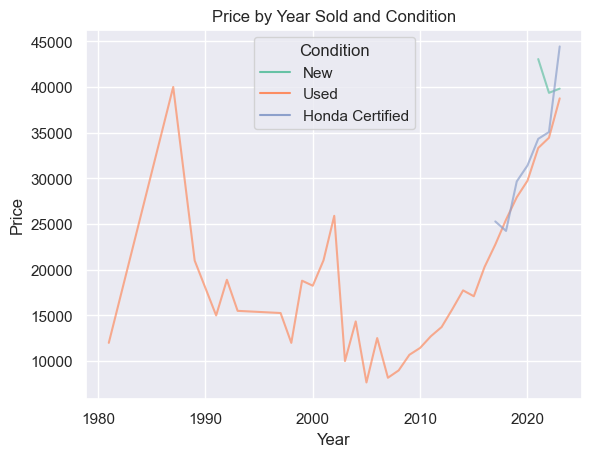

In [50]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Year', y='Price', hue='Condition', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Year Sold and Condition")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

# Data Preprocessing Part 2

In [52]:
df.head()

,Year,Make,Condition,Price,Consumer_Rating,Consumer_Review_#,Drivetrain,Fuel_Type,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,2023,Honda,New,46370,4.8,9,All-wheel Drive,Gasoline,5.0,4.8,4.8,4.2,5.0,5.0,California,Dealer
1,2023,Honda,New,34150,1.7,24,FWD,Hybrid,5.0,3.0,4.0,4.0,5.0,5.0,California,Dealer
2,2023,Honda,New,34245,4.7,2869,Front-wheel Drive,Hybrid,5.0,3.0,4.0,4.0,5.0,5.0,California,Dealer
3,2022,Honda,New,46500,5.0,12,All-wheel Drive,Gasoline,5.0,5.0,5.0,5.0,5.0,5.0,California,Dealer
4,2023,Honda,New,40395,4.4,12,All-wheel Drive,Hybrid,5.0,3.0,4.0,4.0,5.0,5.0,California,Dealer


In [53]:
df.drop(columns=['Year', 'Make', 'State'], inplace=True)
df.shape

(4958, 13)

In [55]:
df.dtypes

Condition                   object
Price                        int32
Consumer_Rating            float64
Consumer_Review_#            int64
Drivetrain                  object
Fuel_Type                   object
Comfort_Rating             float64
Interior_Design_Rating     float64
Performance_Rating         float64
Value_For_Money_Rating     float64
Exterior_Styling_Rating    float64
Reliability_Rating         float64
Seller_Type                 object
dtype: object

In [56]:
# iterate over columns with object datatype
for col in df.select_dtypes(include='object'):
    # count the unique number of values
    unique_count = df[col].nunique()
    # print the result
    print(f'The number of unique values in the "{col}" column is: {unique_count}')

The number of unique values in the "Condition" column is: 3
The number of unique values in the "Drivetrain" column is: 7
The number of unique values in the "Fuel_Type" column is: 7
The number of unique values in the "Seller_Type" column is: 2


# Check Missing Value

In [57]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Comfort_Rating             10.891489
Interior_Design_Rating     10.891489
Performance_Rating         10.891489
Value_For_Money_Rating     10.891489
Exterior_Styling_Rating    10.891489
Reliability_Rating         10.891489
Seller_Type                 1.472368
Drivetrain                  0.221864
Fuel_Type                   0.221864
dtype: float64

# Fill the missing value

In [58]:
df['Seller_Type'].fillna('Other', inplace=True)
df['Drivetrain'].fillna('Other', inplace=True)
df['Fuel_Type'].fillna('Other', inplace=True)
df['Comfort_Rating'].fillna(df['Comfort_Rating'].median(), inplace=True)
df['Interior_Design_Rating'].fillna(df['Interior_Design_Rating'].median(), inplace=True)
df['Performance_Rating'].fillna(df['Performance_Rating'].median(), inplace=True)
df['Value_For_Money_Rating'].fillna(df['Value_For_Money_Rating'].median(), inplace=True)
df['Exterior_Styling_Rating'].fillna(df['Exterior_Styling_Rating'].median(), inplace=True)
df['Reliability_Rating'].fillna(df['Reliability_Rating'].median(), inplace=True)

In [59]:
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# Label Encoding for Object datatype

In [60]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Condition: ['New' 'Used' 'Honda Certified']
Drivetrain: ['All-wheel Drive' 'FWD' 'Front-wheel Drive' 'AWD' 'Other'
 'Rear-wheel Drive' '–' 'Four-wheel Drive']
Fuel_Type: ['Gasoline' 'Hybrid' 'Other' '5-Speed A/T' 'A/T' '6-Speed M/T'
 'CVT Transmission' 'Compressed Natural Gas']
Seller_Type: ['Dealer' 'Other' 'Individual']


In [61]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Condition: [1 2 0]
Drivetrain: [1 2 4 0 5 6 7 3]
Fuel_Type: [5 6 7 0 2 1 3 4]
Seller_Type: [0 2 1]


# Remove Outlier Using Z-Score

In [62]:
from scipy import stats

# define a function to remove outliers using z-score for only selected numerical columns
def remove_outliers(df, cols, threshold=3):
    # loop over each selected column
    for col in cols:
        # calculate z-score for each data point in selected column
        z = np.abs(stats.zscore(df[col]))
        # remove rows with z-score greater than threshold in selected column
        df = df[(z < threshold) | (df[col].isnull())]
    return df

In [63]:
#before removed
df.shape

(4958, 13)

In [64]:
#after removed
selected_cols = ['Consumer_Rating', 'Consumer_Review_#', 'Comfort_Rating', 'Interior_Design_Rating', 'Performance_Rating', 
            'Value_For_Money_Rating', 'Exterior_Styling_Rating', 'Reliability_Rating']
df_clean = remove_outliers(df, selected_cols)
df_clean.shape

(4228, 13)

<AxesSubplot:>

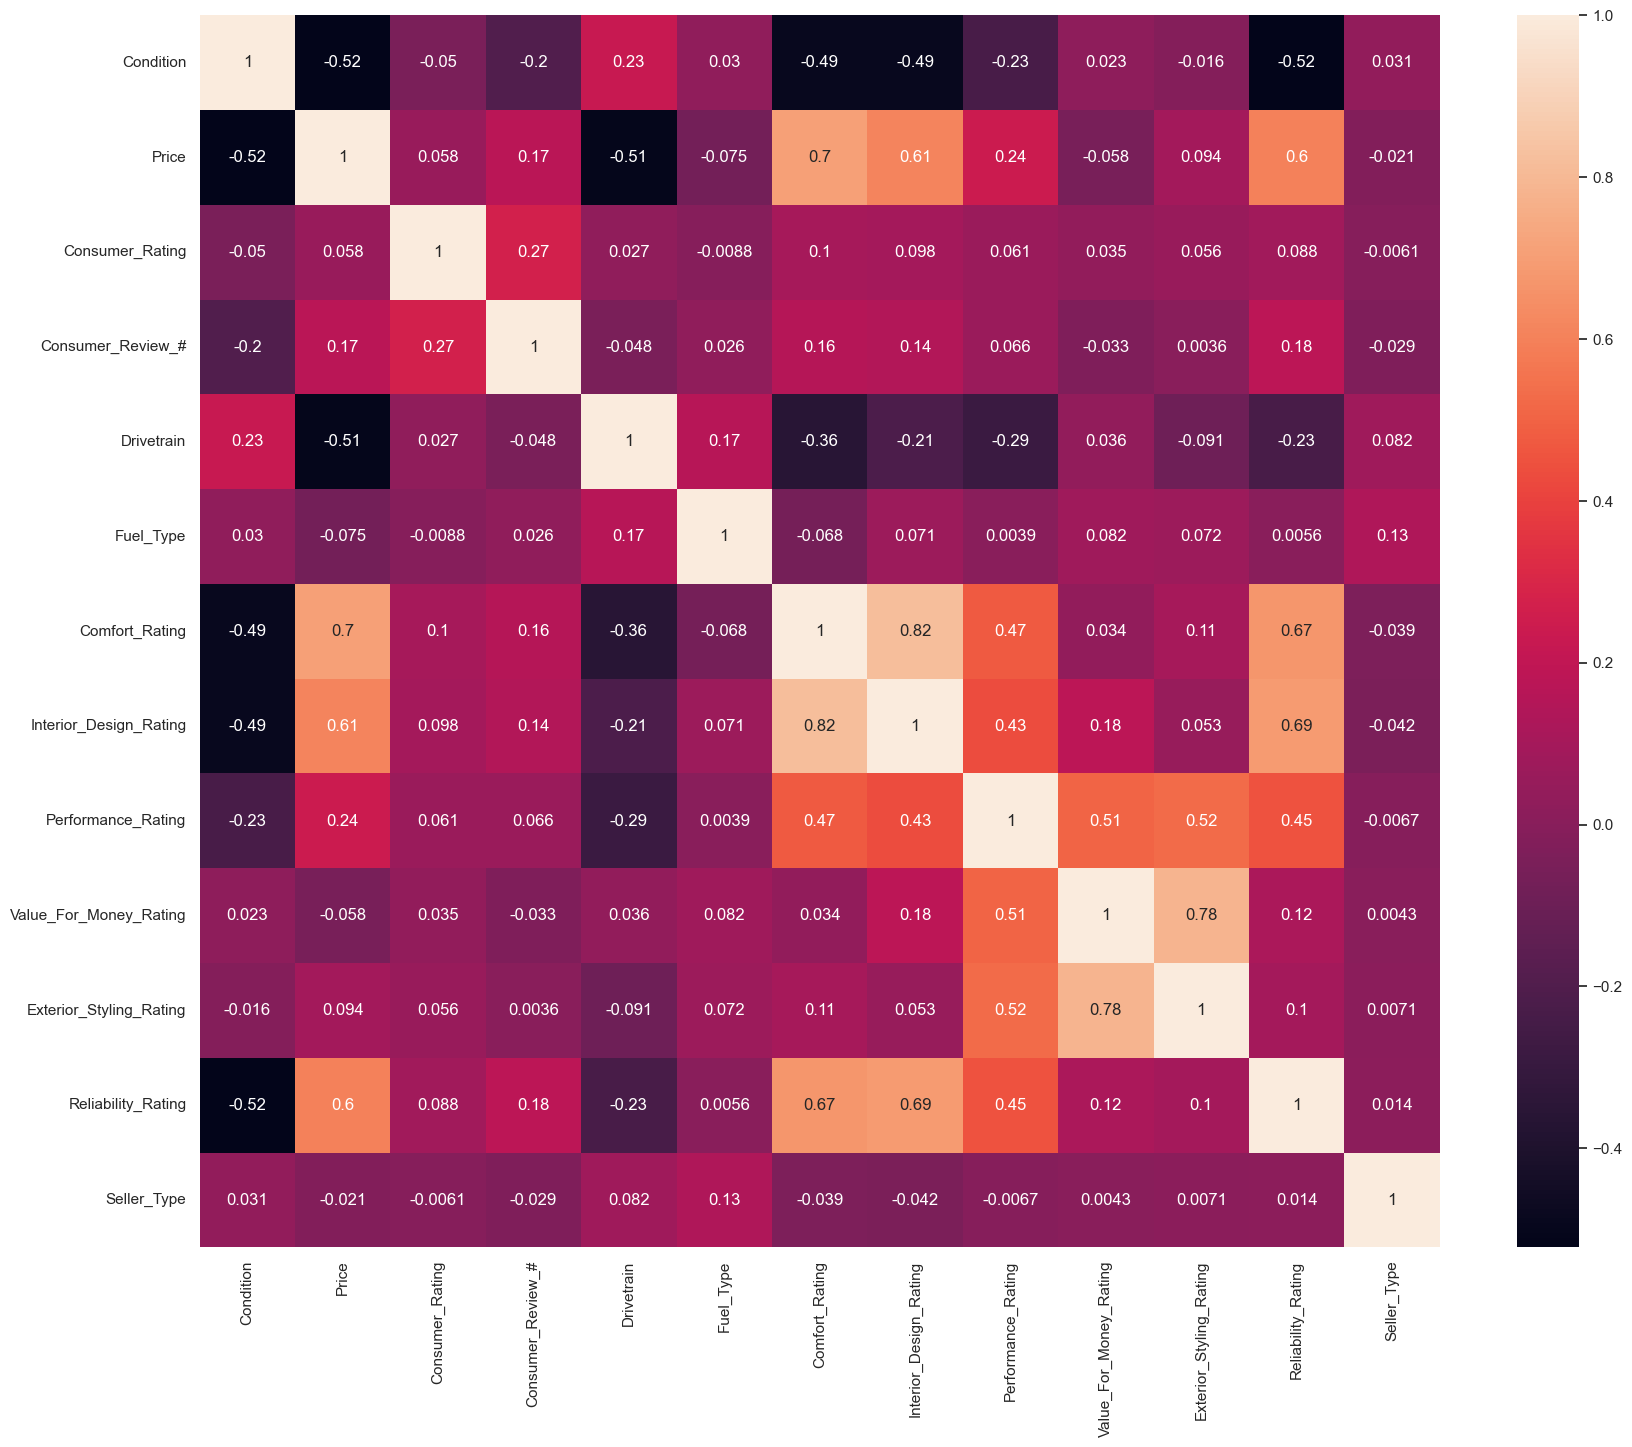

In [65]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df_clean.corr(), fmt='.2g', annot=True)

# Machine Learning Model Building

In [66]:
X = df_clean.drop('Price', axis=1)
y = df_clean['Price']

In [67]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Decision Tree Regressor

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston


# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8}


In [69]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=8, max_features='auto', min_samples_leaf=2, min_samples_split=8)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=0)

In [70]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 3134.865222316432
MAPE is 0.11195476974040078
MSE is 19213180.39040427
R2 score is 0.820205744447162
RMSE score is 4383.284201418414


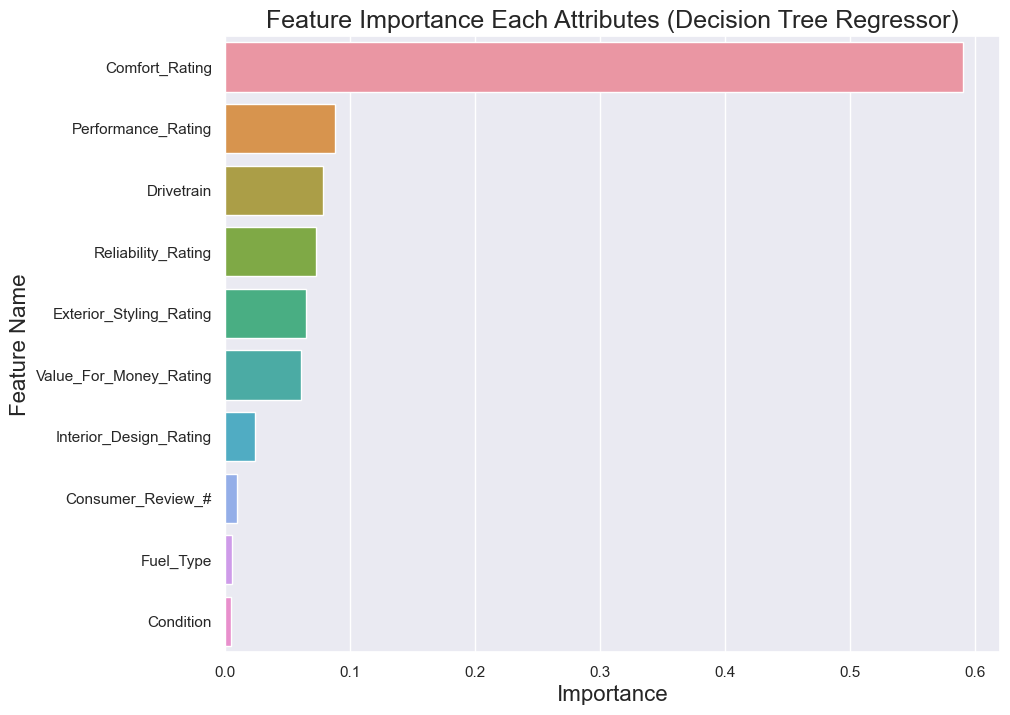

In [71]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

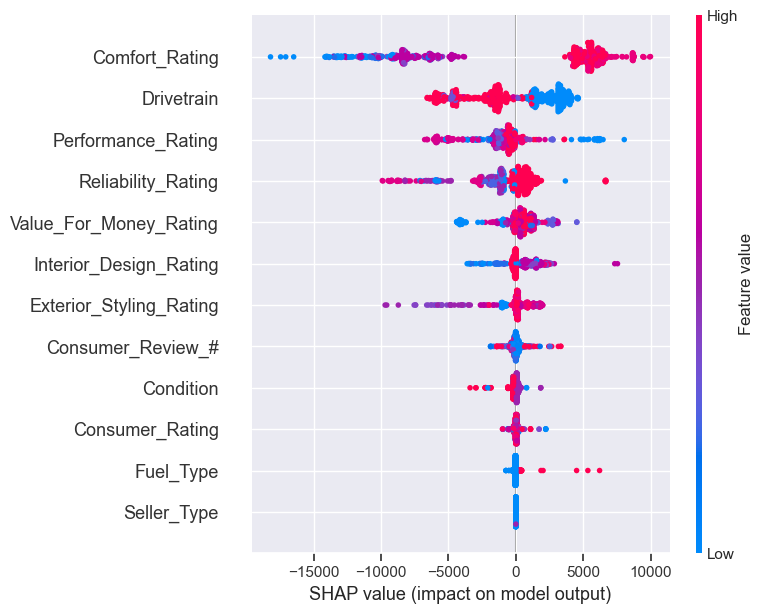

In [72]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

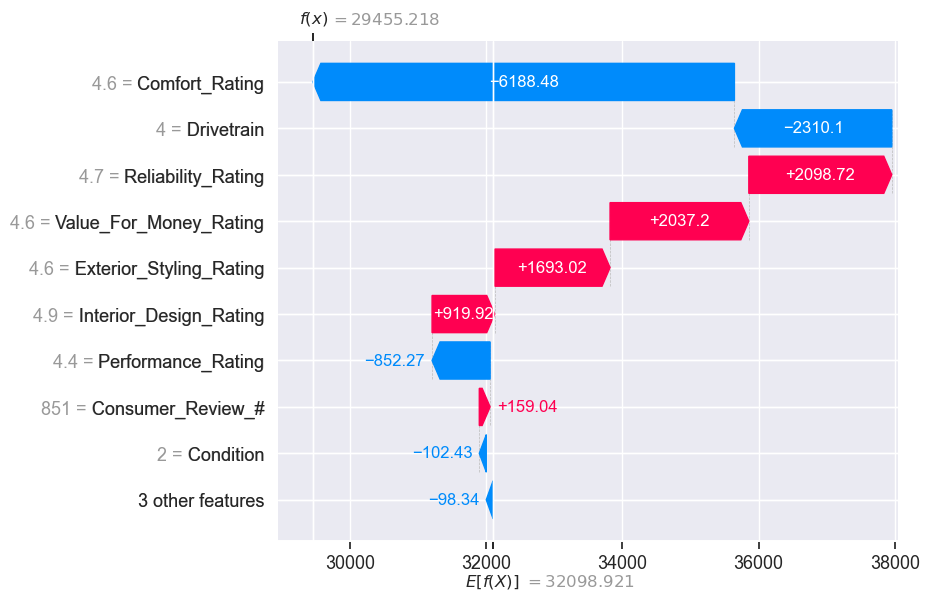

In [78]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

# Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [80]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=9, min_samples_split=2, min_samples_leaf=1, 
                           max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt', random_state=0)

In [81]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 2948.0877222202625
MAPE is 0.10692572096216799
MSE is 15524242.137513982
R2 score is 0.8547263128008555
RMSE score is 3940.08148868954


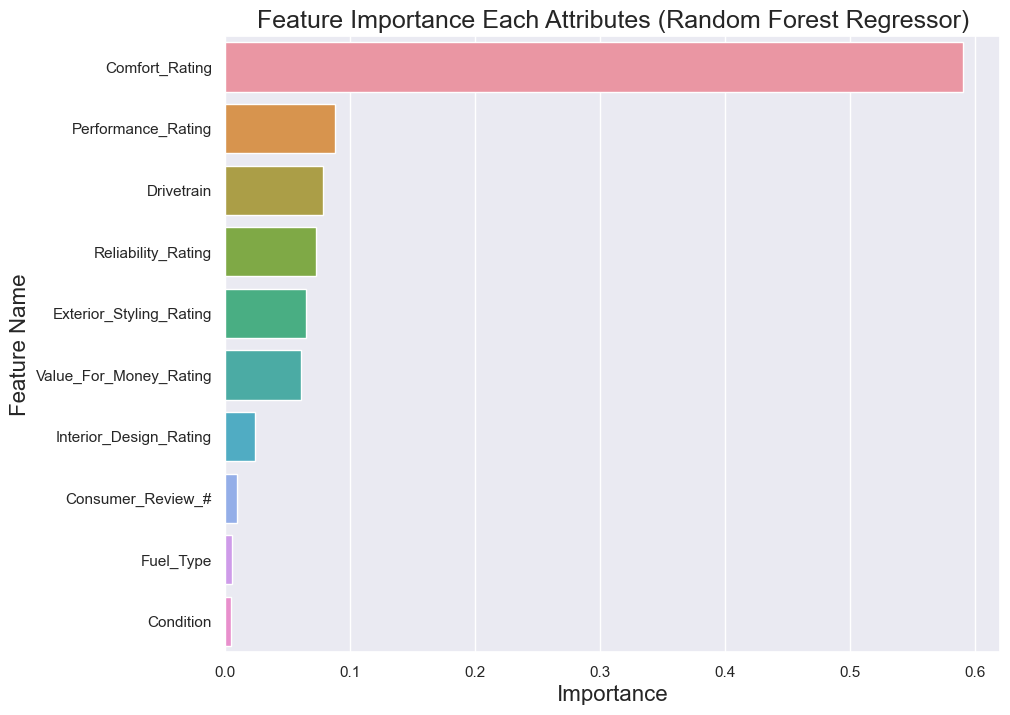

In [82]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

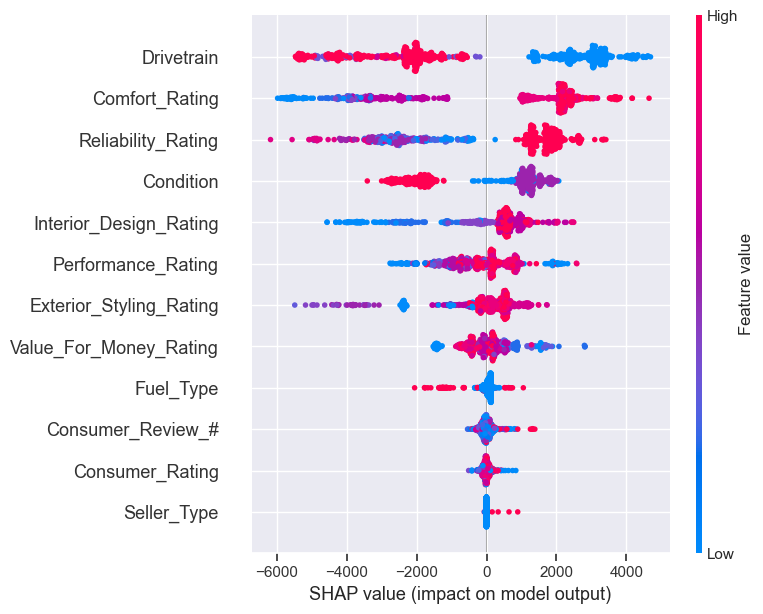

In [83]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

 99%|===================| 836/846 [00:11<00:00]       

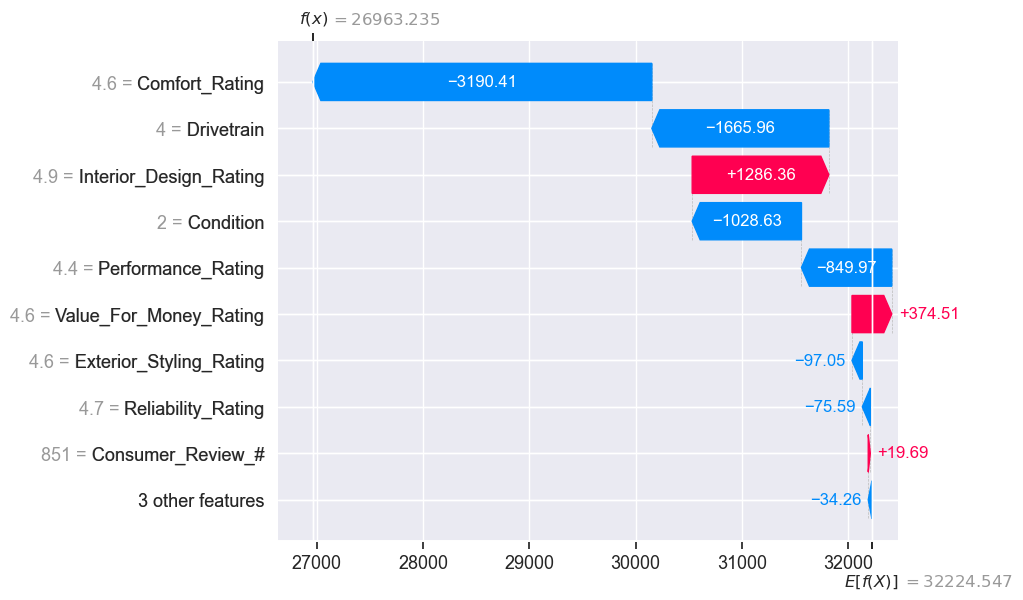

In [103]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])